In [3]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
np.random.seed(1)

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 0


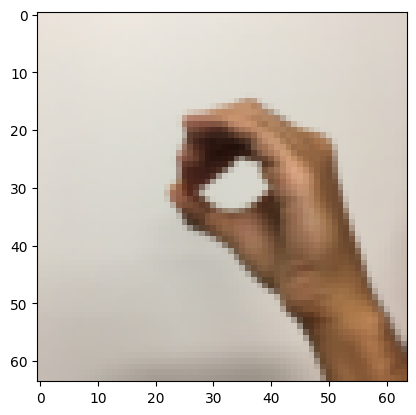

In [8]:
index = 50
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [10]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [11]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [12]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 4s 31ms/step - loss: 1.8427 - accuracy: 0.1722 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7926 - accuracy: 0.1787 - val_loss: 1.7852 - val_accuracy: 0.2417
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7853 - accuracy: 0.2685 - val_loss: 1.7803 - val_accuracy: 0.2750
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7800 - accuracy: 0.2843 - val_loss: 1.7755 - val_accuracy: 0.2750
Epoch 5/100
17/17 [==============================] - 0s 17ms/step - loss: 1.7752 - accuracy: 0.2944 - val_loss: 1.7698 - val_accuracy: 0.2917
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 1.7689 - accuracy: 0.3259 - val_loss: 1.7629 - val_accuracy: 0.3583
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7621 - accuracy: 0.3537 - val_loss: 1.7562 - val_accuracy: 0.4083
Epoch 8/10

In [14]:
history.history

{'loss': [1.8427417278289795,
  1.7925946712493896,
  1.7852783203125,
  1.7800352573394775,
  1.7751545906066895,
  1.7689082622528076,
  1.762087345123291,
  1.7544512748718262,
  1.743131399154663,
  1.7303080558776855,
  1.7152469158172607,
  1.697869896888733,
  1.676767349243164,
  1.652454137802124,
  1.624580979347229,
  1.5922940969467163,
  1.5569934844970703,
  1.519673466682434,
  1.481730341911316,
  1.4419182538986206,
  1.4028871059417725,
  1.3654673099517822,
  1.3279999494552612,
  1.2913777828216553,
  1.257127046585083,
  1.2246730327606201,
  1.1927202939987183,
  1.1632752418518066,
  1.1352463960647583,
  1.1080057621002197,
  1.0823320150375366,
  1.0578309297561646,
  1.035205602645874,
  1.0126806497573853,
  0.9906070232391357,
  0.9702634215354919,
  0.9502641558647156,
  0.9326130151748657,
  0.9147139191627502,
  0.8987462520599365,
  0.8823222517967224,
  0.8681318759918213,
  0.8528396487236023,
  0.8394546508789062,
  0.8261024355888367,
  0.81407022476

<ipython-input-15-b296b54b08f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-15-b296b54b08f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

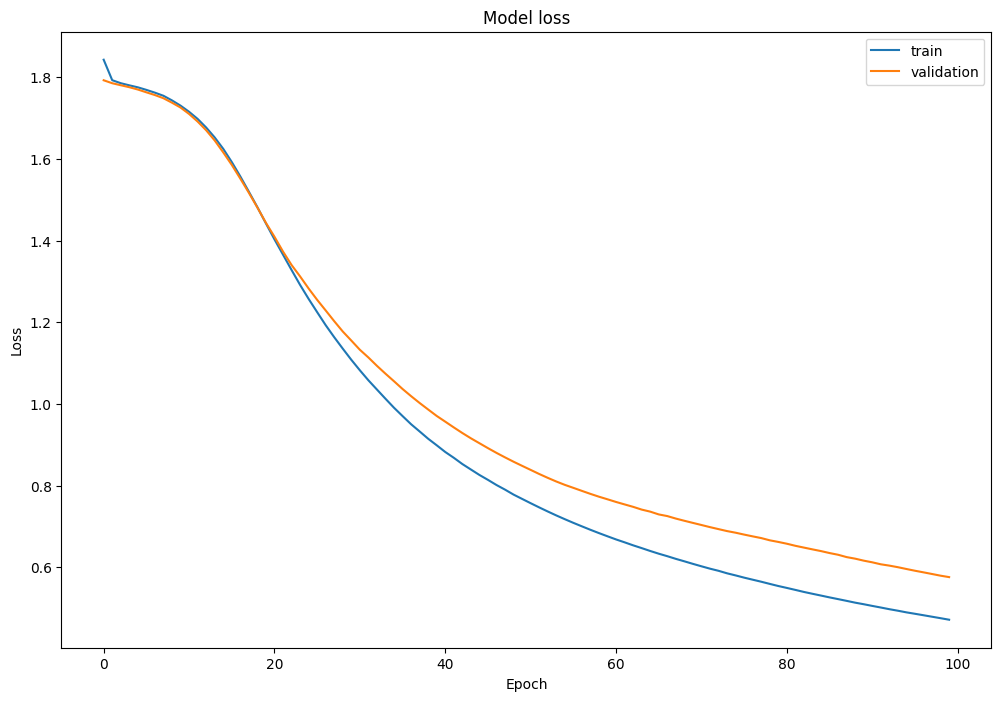

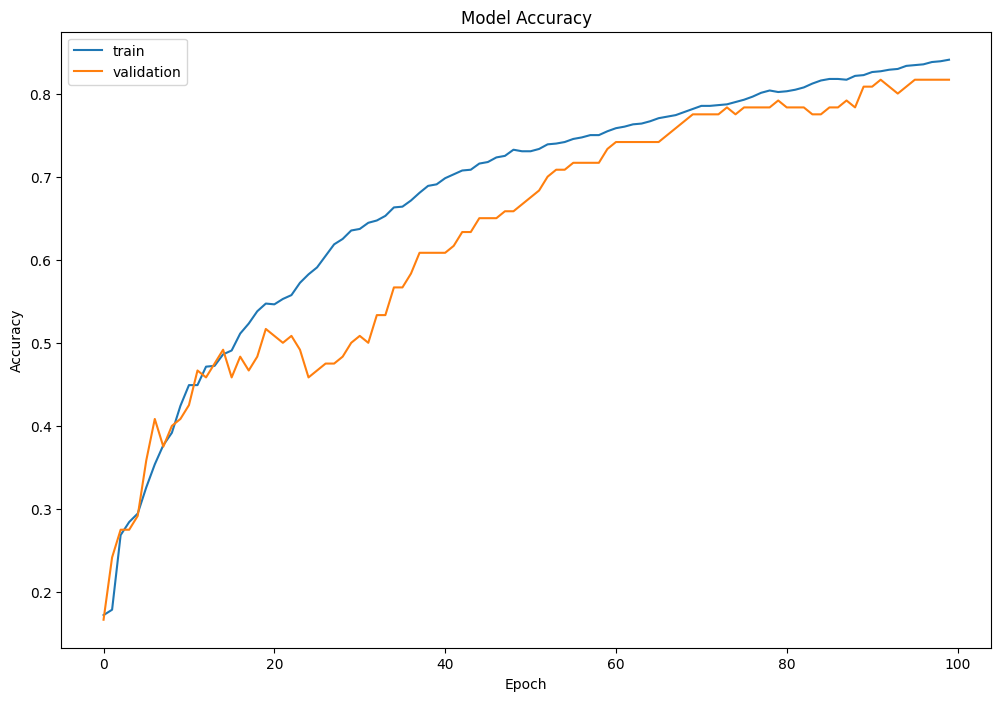

In [15]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')